<a href="https://colab.research.google.com/github/allnes/age_classifier/blob/master/zip_size/size_80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
age_classifier	LICENSE.txt  rcv1.ipynb        summaries
checkpoints	makefile     README.md	       trials
lib		nips2016     requirements.txt  usage.ipynb
From https://github.com/allnes/cnn_graph
 * branch            graph_train -> FETCH_HEAD
Already up to date.
['arr_0', 'arr_1']
(729, 6400)
(729,)
--> Reshape data


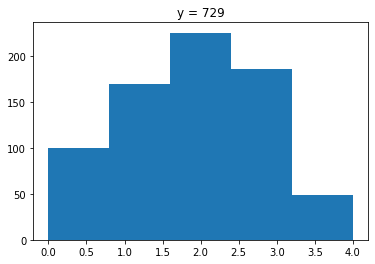

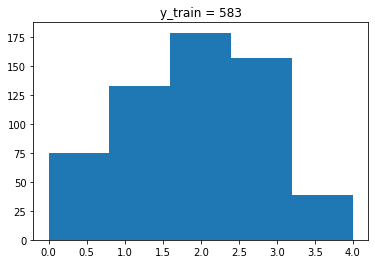

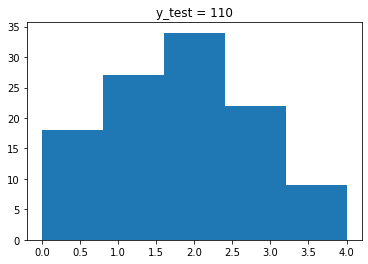

[0 1 2 3 4]
--> Get distance graph
d = |V| = 80, k|V| < |E| = 50408


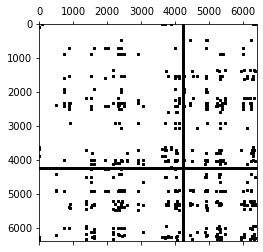

--> Get laplacian matrix


/content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/coarsening.py:152: RuntimeWarning: divide by zero encountered in true_divide
  tval = vv[rs+jj] * (1.0/weights[tid] + 1.0/weights[nid])
/content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/coarsening.py:152: RuntimeWarning: divide by zero encountered in true_divide
  tval = vv[rs+jj] * (1.0/weights[tid] + 1.0/weights[nid])
/content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/coarsening.py:152: RuntimeWarning: divide by zero encountered in true_divide
  tval = vv[rs+jj] * (1.0/weights[tid] + 1.0/weights[nid])


Layer 0: M_0 = |V| = 49512 nodes (43112 added),|E| = 25204 edges
Layer 1: M_1 = |V| = 24756 nodes (18418 added),|E| = 25165 edges
Layer 2: M_2 = |V| = 12378 nodes (6105 added),|E| = 24958 edges
Layer 3: M_3 = |V| = 6189 nodes (0 added),|E| = 24786 edges
(583, 49512)
(36, 49512)
(110, 49512)
NN architecture
  input: M_0 = 49512
  layer 1: cgconv1
    representation: M_0 * F_1 / p_1 = 49512 * 32 / 4 = 396096
    weights: F_0 * F_1 * K_1 = 1 * 32 * 16 = 512
    biases: M_1 * F_1 = 49512 * 32 = 1584384
  layer 2: cgconv2
    representation: M_1 * F_2 / p_2 = 12378 * 32 / 2 = 198048
    weights: F_1 * F_2 * K_2 = 32 * 32 * 16 = 16384
    biases: M_2 * F_2 = 12378 * 32 = 396096
  layer 3: fc1
    representation: M_3 = 700
    weights: M_2 * M_3 = 198048 * 700 = 138633600
    biases: M_3 = 700
  layer 4: logits (softmax)
    representation: M_4 = 5
    weights: M_3 * M_4 = 700 * 5 = 3500
    biases: M_4 = 5
step 100 / 1166 (epoch 2.74 / 32):
  learning_rate = 9.02e-04, loss_average = 2.71e+02

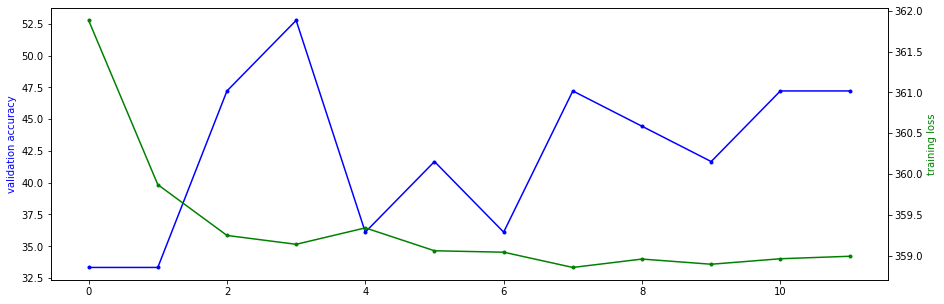

Time per step: 235.98 ms
(110, 49512) (110,)
############ Class 0
(18, 49512)
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/../checkpoints/demo/model-1166
accuracy: 0.00 (0 / 18), f1 (weighted): 0.00, loss: 4.79e+02
time: 1s (wall 1s)
############ Class 1
(27, 49512)
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/../checkpoints/demo/model-1166
accuracy: 44.44 (12 / 27), f1 (weighted): 61.54, loss: 3.19e+02
time: 1s (wall 1s)
############ Class 2
(34, 49512)
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/../checkpoints/demo/model-1166
accuracy: 91.18 (31 / 34), f1 (weighted): 95.38, loss: 3.80e+02
time: 1s (wall 1s)
############ Class 3
(22, 49512)
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/../checkpoints/demo/model-1166
accuracy: 0.00 (0 / 22), f1 (weighted): 0.00, loss: 3

In [3]:
%tensorflow_version 1.x

from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/')
!ls

# !git clone https://github.com/mdeff/cnn_graph
# !git status
# !git fetch
# !git checkout graph_train
!git pull origin graph_train

# classes = { 2, 3, 4, 5, 6, 7, 9 }
# zip_size = { 64, 80, 96, 112, 128, 160, 192, 224 }

%run age_classifier/age_classes_fcn \
  --path_project='/content/drive/My Drive/DL_DATA_GRAPH/' \
  --path_data='NEW/resize/converted_data_resize_80.npz' \
  --zip_size=80 \
  --class_count=5 \
  --fcn_count=700 \

%matplotlib inline